<a href="https://colab.research.google.com/github/Krupa049/ANN/blob/main/ANN_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
def buildAndTrainTheModel(x,y):

  # Building the model
  ANNreg = nn.Sequential(
      nn.Linear(1,1),   # input layer
      nn.ReLU(),        # Activation Function
      nn.Linear(1,1)    # Output layer
     )

  # Loss function and Optimizer functions
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)

  # Training the model
  numepochs = 500
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    # Forward pass
    yHat = ANNreg(x)

    # Computing the loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # Backpropogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Ending the training loop

  # Computing Model Predictions
  predictions = ANNreg(x)

  # Output
  return predictions, losses

In [3]:
# Function to create the data

def createTheData(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

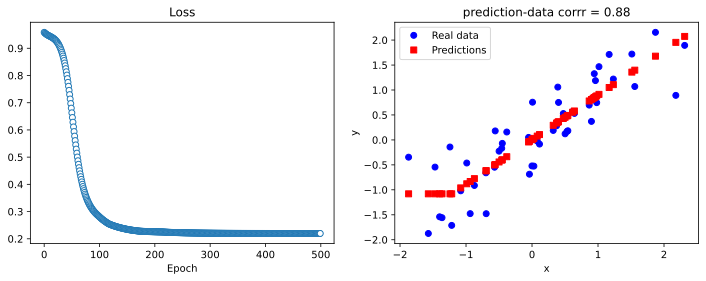

In [4]:
# Testing the data

# Create a Dataset
x,y = createTheData(.8)

# Running the model
yHat,losses = buildAndTrainTheModel(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat.detach().numpy(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corrr = {np.corrcoef(y.T.detach().numpy(),yHat.T.detach().numpy())[0,1]:.2f}')
ax[1].legend()

plt.show()

In [5]:
# Experiment

# Slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# Initialize the output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):

    # create a dataset and runing the model
    x,y = createTheData(slopes[slopei])
    yHat,losses = buildAndTrainTheModel(x,y)

    # Storing the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T.detach().numpy(),yHat.T.detach().numpy())[0,1]

# Correlation can be 0 if the model didn't do well, Set nan -> 0
results[np.isnan(results)] = 0

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


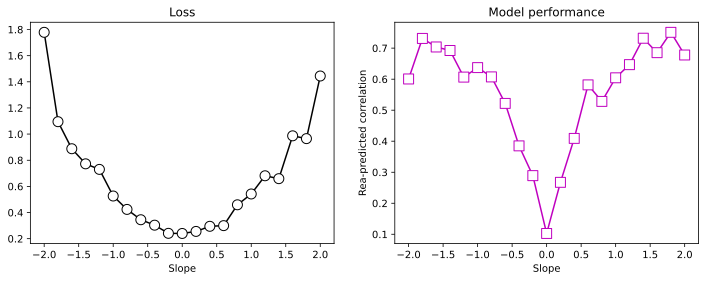

In [6]:
# Plotting

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Rea-predicted correlation')
ax[1].set_title('Model performance')

plt.show()